# The Sparks Foundation
**GRIP-Data Science and Business Analytics -November 2022 [#GRIPNOV22]**

**Task-1 : Prediction using Supervised ML. (Level - Beginner)**

### Name : SREEDEVI KATTOOR

Problem Statement :

1.Predict the percentage of an student based on the number of study hours.

2.What will be predicted score if a student studies for 9.25 hrs/day?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#importing the data
df=pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\GRIP\student_scores - student_scores.csv')

In [3]:
#check data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#check missing values
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

### Check the relationship between two variables - using plot

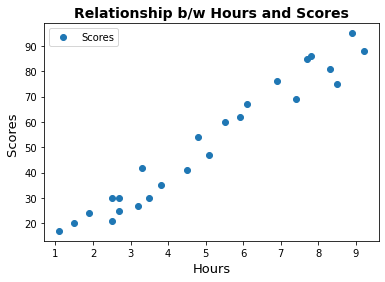

In [7]:
#Scatter plot to find the correlation betweeen Hours and Scores
df.plot(x='Hours', y='Scores', style = 'o')
plt.title('Relationship b/w Hours and Scores', fontsize = 14, weight = 'bold')
plt.xlabel('Hours', fontsize =13)
plt.ylabel('Scores ', fontsize = 13)
plt.show()

In [8]:
#Print correlation plot of numeric columns
#Check the correlation of numeric variables
df_numeric=df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#correlation matrix
corr_matrix=df_numeric.corr()
corr_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


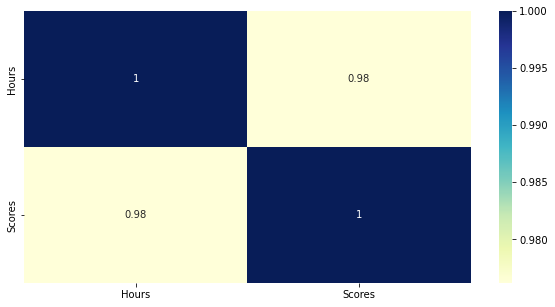

In [10]:
# plot correlations on a heatmap

#figure size
plt.figure(figsize=(10,5))

#heatmap
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)
plt.show()

#### The plot and correlation shows,a positive relation between hours studied and scores obtained by students.

### Preparing data for train_test_split

In [11]:
#create x and y
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values


In [12]:
#import library to split the training-test sample
from sklearn.model_selection import train_test_split

#split data into training and test samples
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [13]:
#import library for linear regression
from sklearn.linear_model import LinearRegression

#create a model object
lr=LinearRegression()



In [14]:
#fit the model
lr.fit(x_train,y_train)


LinearRegression()

In [15]:
m=lr.coef_
c=lr.intercept_

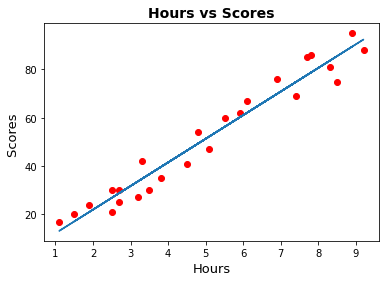

In [16]:
#now plot the regression line

line=m*x+c

#plotting for the test data
plt.scatter(x,y,c='r')
plt.plot(x, line)
plt.title('Hours vs Scores', fontsize = 14, weight = 'bold')
plt.xlabel('Hours', fontsize =13)
plt.ylabel('Scores ', fontsize = 13)
plt.show()


### Making Predictions

In [17]:
#problem statement 1: Predict the percentage of an student based on the number of study hours

print(x_test)
y_pred = lr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [19]:
#problem statement 2: What will be predicted score if a student studies for 9.25 hrs/day

hours = 9.25
pred_score = lr.predict([[hours]])

print('Number of hours studied = {}'. format(hours))
print('Predicted score = {}'. format(pred_score[0]))

Number of hours studied = 9.25
Predicted score = 92.91505723477056


### Evaluate the performance of the model using mean_absolute_error from metrics

In [20]:
from sklearn import metrics

print('mean_absolute_error :', metrics.mean_absolute_error(y_test, y_pred))

mean_absolute_error : 4.419727808027652


### 92.91 is the predicted score if a student studies for 9.25 hrs/day.